<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex03/luiz_gontijo/Luiz_Fernando_Gontijo_Exercicio_aula4_plot_otimo_batch_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Luiz Fernando da Costa Gontijo RA230677

In [1]:
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from torchvision import transforms

from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_data = data[:,0:1]
target = data[:,1:2]
n_samples = x_data.shape[0]

print('dimensões de x_data:', x_data.shape)
print('dimensões de target:', target.shape)

dimensões de x_data: (50, 1)
dimensões de target: (50, 1)


In [10]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(target)
xt_min = x_train.min()
xt_max = x_train.max()
# escalonar valores para entre 0 e 1
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
# escalonar valores para entre 0 e 1
y_train_n = (y_train - yt_min)/(yt_max - yt_min)

In [12]:
# adicionar coluna de bias
x_train_bias = torch.cat([torch.ones(size=(n_samples,1)), x_train_n], dim=1)
print(x_train_bias.shape)

torch.Size([50, 2])


In [14]:
dataset = TensorDataset(x_train_bias, y_train_n)

In [77]:

data_loader = DataLoader(dataset, 
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=True) # se for True, embaralha os dados no inicio de cada iteração

Solução ótima

In [16]:
x_bias, y = next(iter(data_loader))

In [17]:
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t(), w_opt.shape)

tensor([[0.2017, 0.7390]]) torch.Size([2, 1])


In [18]:
w_opt

tensor([[0.2017],
        [0.7390]])

# Exercício é codificar a próxima célula:

Dado o comprimeito das sé palas, calcular o comprimento das pétalas. Sépalas ficam na primeira coluna e as pétalas na segunda.

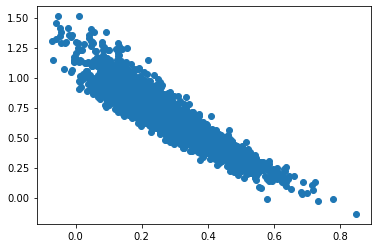

In [78]:
# colocar aqui um laço para 
# calcular os valores ótimos associados a cada batch
# é esperado um gráfico parecido com o gráfico

epochs = range(1000)
wlist = []

for epoch in epochs:
  for step, (x_bias, y) in enumerate(data_loader):
    w = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
    wlist.append(w.T)

w_opt = torch.cat(wlist)
plt.scatter(w_opt[:,0], w_opt[:,1])

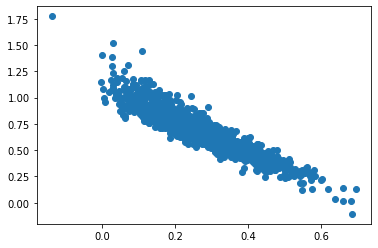

In [ ]:
# Comparação com o gráfico de exemplo encontrado

#w_opt = torch.cat(wlist)
#plt.scatter(w_opt[:,0], w_opt[:,1])

### Resultados para shuffle=False

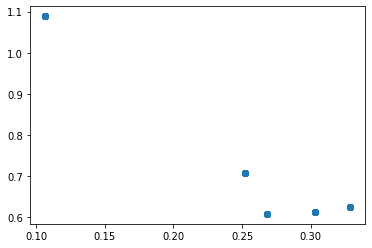

In [75]:
data_loader = DataLoader(dataset, 
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=False) # se for True, embaralha os dados no inicio de cada iteração

epochs = range(500)
wlist = []

for epoch in epochs:
  for step, (x_bias, y) in enumerate(data_loader):
    w = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
    wlist.append(w.T)

w_opt = torch.cat(wlist)
plt.scatter(w_opt[:,0], w_opt[:,1])

## Algumas conclusões sobre o trabalho

A primeira tentativa de iterar sobre os batchs do dataloader foi feita utilizando o enumerate(). No entanto, verifiquei que essa opção não seria necessária. 

Para um dataset com 50 exemplos, considerando batchs de tamanho igual a 10 e 1000 épocas, a quantidade total de valores ótimos encontrada é igual a 5000. Ou seja, são 5 valores ótimos por época. 

Por fim, realizei o mesmo loop para o caso em que o shuffle seria igual a False. Como os valores dentro de cada batch não são alterados, os valores ótimos encontrados são sempre iguais. 

### Fim do notebook